<a href="https://colab.research.google.com/github/3lonco/ColabNotebooks/blob/main/kNearestNeighborFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://kunassy.com/knn-from-scratch/
#import library

import scipy.spatial.distance as distance
import scipy.stats as stats
import numpy as np

In [6]:
# Implementation of k-NN
class knn:
  def __init__(self,k,metric):
    self.k = k
    self.metric = metric
  
  # A method which caluculates Nearest Neibors by using distance between test data and train data.
  def neighbors(self,X_test,X_train):
    metric = self.metric
    k = self.k
    dist = distance.cdist(X_test,X_train,metric)
    neighbors_index = np.argpartition(dist,k)[:,:k]
    return neighbors_index
  
  def predict(self,X_test,X_train,y):
    # extract the nearrest index
    neighbors_index = self.neighbors(X_test,X_train)
    
    labels, y_labels = np.unique(y,return_inverse=True)

    label_index, _ =stats.mode(y_labels[neighbors_index],axis=1)
    pred = labels.take(label_index).ravel()
    return pred
  








In [7]:
# データを生成（各点は[気温、湿度」の組にした）
X_train = np.array([[23.5,44.0],[24.0,40.5],[26.0,25.5],[26.5,42.5],[28.0,50.5],[30.0,43.0]])
X_test = np.array([[22.0,24.5],[25.5,30.0],[27.5,35.0],[29.0, 55.5]])
y = ["good","good","good","good","bad","bad"]
# クラスを呼び出してオブジェクトを生成
kNN = knn(k=2,  metric="euclidean")
# 予測を実行
pred = kNN.predict(X_test, X_train, y)

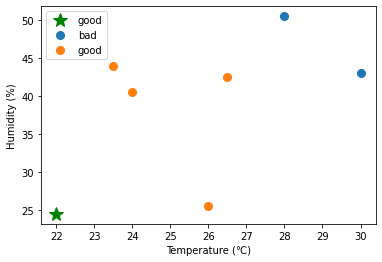

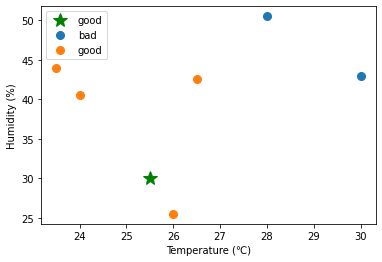

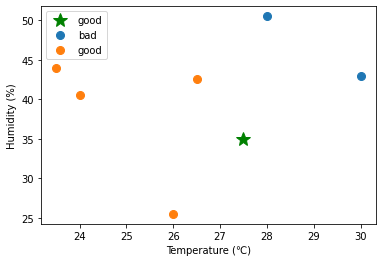

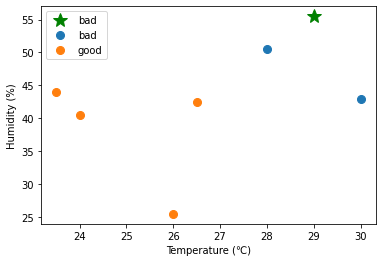

In [8]:
# ラベル別に点の座標群を格納するための関数
def group(X, labels):
    groups = {}
    u, index = np.unique(labels, return_inverse=True)
    for i in u:
        # ユニークなラベルiに一致するインデックスを取得
        members_idx = [j for j, e in enumerate(labels) if e == i]
        groups[i] = X[members_idx]
    return groups


import matplotlib.pyplot as plt

# グラフ描画
for (s,t) in zip(X_test, pred):
    fig, ax = plt.subplots()
    ax.plot(s[0] , s[1], marker='*', color="g", linestyle='',ms=15, label=t)
    #ax.scatter(x[0] , x[1])
    for key, value in group(X_train, y).items():
        ax.plot(value[:, 0] , value[:, 1], marker='o', linestyle='', ms=8, label=key)
        #ax.scatter(value[:, 0] , value[:, 1])
    ax.set_xlabel("Temperature (℃)")
    ax.set_ylabel("Humidity (%)")
    ax.legend()
    plt.show()